In [63]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
df = pd.read_csv("Training_set.csv")

In [119]:
df.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [125]:
df.isnull().sum()

filename    0
label       0
dtype: int64

In [59]:
df['filename'] = 'F://AI//FirstClassification//train//' + df['filename']

In [60]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

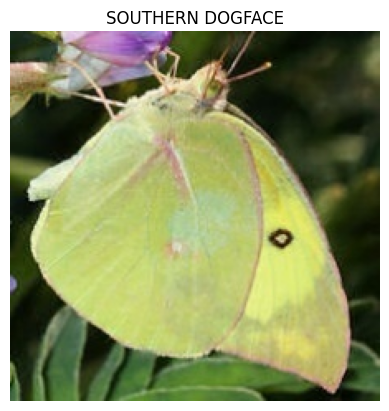

In [61]:
img_path = df.loc[0, 'filename']  # ambil path gambar dari baris pertama
img = Image.open(img_path)       # buka gambarnya

plt.imshow(img)
plt.axis('off')  # hilangkan axis
plt.title(df.loc[0, 'label'])  # tambahkan label sebagai judul
plt.show()

In [113]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


In [66]:
num_classes = len(train_generator.class_indices)

model = Sequential([
    Input(shape=(224, 224,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=10)

C:\Users\MrBento\anaconda3\envs\streamlit-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 65s 195ms/step - accuracy: 0.0425 - loss: 4.2249 - val_accuracy: 0.2232 - val_loss: 3.0853
Epoch 2/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.3500 - loss: 2.5115 - val_accuracy: 0.3664 - val_loss: 2.3760
Epoch 3/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.6507 - loss: 1.2883 - val_accuracy: 0.3957 - val_loss: 2.3445
Epoch 4/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 91ms/step - accuracy: 0.8534 - loss: 0.5363 - val_accuracy: 0.3903 - val_loss: 2.9102
Epoch 5/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.9501 - loss: 0.1941 - val_accuracy: 0.4026 - val_loss: 3.2842
Epoch 6/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.9839 - loss: 0.0877 - val_accuracy: 0.4111 - val_loss: 3.6643
Epoch 7/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.9895 - loss: 0.0545 - val_accuracy: 0.3903 - val_loss: 4.1020
Epoch 8/10
325/325 ━━━━━━━━━━━━━━━━━━━━ 30s 92ms/step - accuracy: 0.9872 - loss: 0.0541 -

In [68]:
label_map = {v: k for k, v in train_generator.class_indices.items()}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


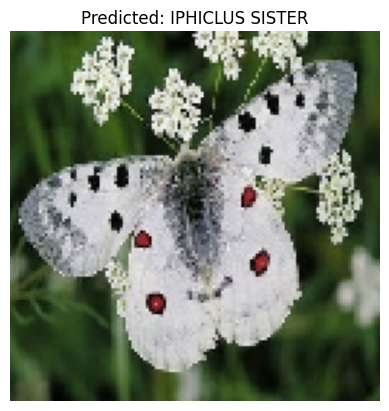

In [72]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Ganti dengan nama file yang ingin diuji
filename = "Image_66.jpg"
img_path = f"F://AI//FirstClassification//train//{filename}"

# Load gambar dan preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalisasi
img_array = np.expand_dims(img_array, axis=0)  # tambahkan batch dimensi

# Prediksi
pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])
predicted_label = label_map[predicted_class]

# Tampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Baca file test
test_df = pd.read_csv('Testing_set.csv')
test_df['filepath'] = 'F://AI//FirstClassification//train//' + test_df['filename']

# 2. Fungsi untuk prediksi 1 gambar
def predict_image(path):
    img = image.load_img(path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_index = np.argmax(pred[0])
    label = label_map[class_index]
    return label

# 3. Prediksi semua gambar
test_df['predicted_label'] = test_df['filepath'].apply(predict_image)

# 4. Lihat hasil 5 teratas
print(test_df.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [80]:
test_df.to_csv('test_predicted.csv')

In [83]:
test_df

,filename,filepath,predicted_label
0,Image_1.jpg,F://AI//FirstClassification//train//Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,F://AI//FirstClassification//train//Image_2.jpg,ADONIS
2,Image_3.jpg,F://AI//FirstClassification//train//Image_3.jpg,PEACOCK
3,Image_4.jpg,F://AI//FirstClassification//train//Image_4.jpg,MONARCH
4,Image_5.jpg,F://AI//FirstClassification//train//Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...,...
2781,Image_2782.jpg,F://AI//FirstClassification//train//Image_2782...,IPHICLUS SISTER
2782,Image_2783.jpg,F://AI//FirstClassification//train//Image_2783...,BANDED ORANGE HELICONIAN
2783,Image_2784.jpg,F://AI//FirstClassification//train//Image_2784...,RED SPOTTED PURPLE
2784,Image_2785.jpg,F://AI//FirstClassification//train//Image_2785...,ATALA


In [84]:
train_df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [82]:
train_df = pd.read_csv('Training_set.csv')  # ini yang ada label aslinya
test_pred_df = pd.read_csv('test_predicted.csv')  # hasil prediksi

In [85]:
merged_df = test_pred_df.merge(train_df, on='filename', how='left')

In [86]:
from sklearn.metrics import accuracy_score

y_true = merged_df['label']
y_pred = merged_df['predicted_label']

acc = accuracy_score(y_true, y_pred)
print(f"Akurasi di test set: {acc:.2f}")

Akurasi di test set: 0.70


In [92]:
salah_prediksi = merged_df[merged_df['label'] != merged_df['predicted_label']]
salah_prediksi

,Unnamed: 0,filename,filepath,predicted_label,label
2,2,Image_3.jpg,F://AI//FirstClassification//train//Image_3.jpg,PEACOCK,BROWN SIPROETA
5,5,Image_6.jpg,F://AI//FirstClassification//train//Image_6.jpg,ATALA,CAIRNS BIRDWING
6,6,Image_7.jpg,F://AI//FirstClassification//train//Image_7.jpg,ULYSES,GREEN CELLED CATTLEHEART
7,7,Image_8.jpg,F://AI//FirstClassification//train//Image_8.jpg,BECKERS WHITE,EASTERN DAPPLE WHITE
8,8,Image_9.jpg,F://AI//FirstClassification//train//Image_9.jpg,RED ADMIRAL,BROWN SIPROETA
...,...,...,...,...,...
2560,2560,Image_2561.jpg,F://AI//FirstClassification//train//Image_2561...,JULIA,CLOUDED SULPHUR
2643,2643,Image_2644.jpg,F://AI//FirstClassification//train//Image_2644...,ORANGE OAKLEAF,CLEOPATRA
2679,2679,Image_2680.jpg,F://AI//FirstClassification//train//Image_2680...,ORANGE OAKLEAF,GREY HAIRSTREAK
2693,2693,Image_2694.jpg,F://AI//FirstClassification//train//Image_2694...,COMMON BANDED AWL,ADONIS
